### Imports

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
# Computational packages
import numpy as np
import matplotlib.pyplot as plt
import torch
import tqdm
import cv2 as cv

# General packages
import datetime
import sys
import os

# custom packages
import ratsimulator
from ratsimulator.Environment import Rectangle
import spatial_maps as sm # CINPLA spatial maps

# avoid adding multiple relave paths to sys.path
sys.path.append("../../src") if "../../src" not in sys.path else None 
from PlaceCells import PlaceCells
from Models import SorscherRNN
from Experiment import Experiment
from methods import *
from datahandling import *
from stats import *

In [3]:
base_path = "/mnt/WD12TB-HDD"
experiment = Experiment(name = '3ME_large_batch', base_path=base_path)
experiment.setup()

# detach experiment specifics
params = experiment.params
environments = experiment.environments
agents = experiment.agents
pc_ensembles = experiment.pc_ensembles
paths = experiment.paths

Experiment <3ME_large_batch> already EXISTS. Loading experiment settings!
Loading experiment details
This experiment has ALREADY been setup - SKIPPING.


In [4]:
with open(experiment.paths['ratemaps'] / 'env_0' / filenames(experiment.paths['ratemaps'] / 'env_0')[-1], "rb") as f:
    ratemaps = pickle.load(f)

# smooth ratemaps
for i in range(len(ratemaps)):
    ratemaps[i] = scipy.ndimage.gaussian_filter(ratemaps[i], sigma=1) # we like sigma=1

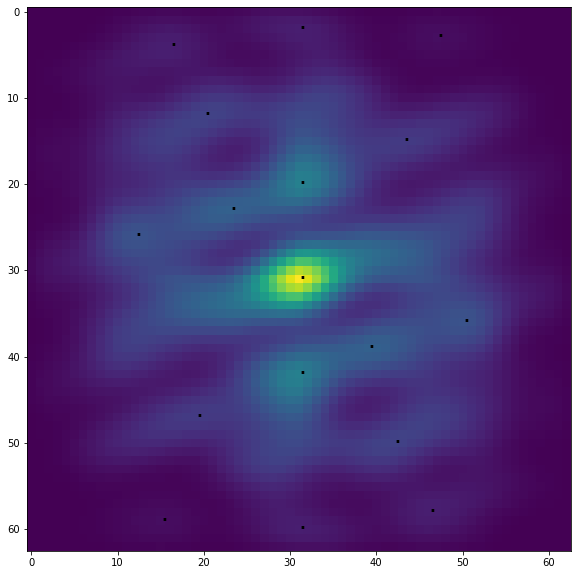

In [63]:
unit=1
img = scipy.signal.correlate(ratemaps[unit], ratemaps[unit], mode='full')

peaks = sm.find_peaks(img)
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img.T)

for peak in peaks:
    ax.annotate('.', xy=peak, fontsize=25)

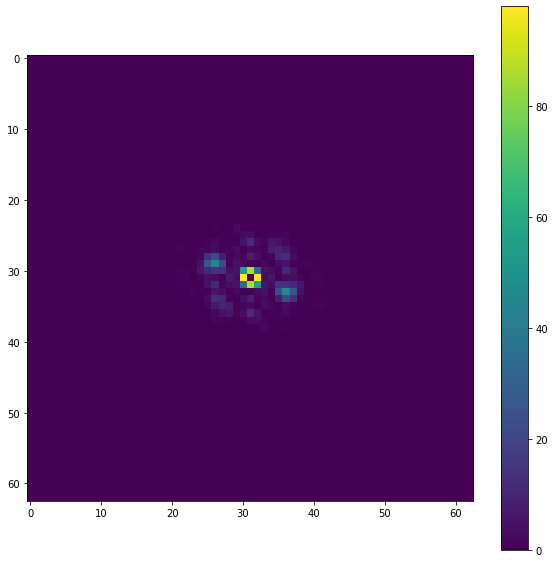

In [6]:
fig=plt.figure(figsize=(10,10))
fftimg = np.abs(np.fft.fft2(img))
fftimg[0,0] = 0
fftimg = np.fft.fftshift(fftimg)
plt.imshow(fftimg)
plt.colorbar()

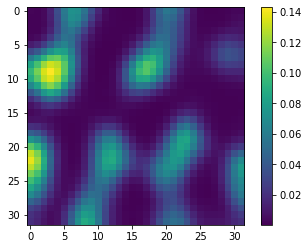

In [65]:
plt.imshow(ratemaps[1])
plt.colorbar()

In [66]:
np.min(ratemaps[1])

0.00021890359468469824

[0.         1.         0.         6.84943324 0.         3.15056676
 0.         2.96150997 0.         0.11529965 0.         2.57628794
 0.         1.36356448 0.         3.28498957 0.         2.76772598
 0.        ]


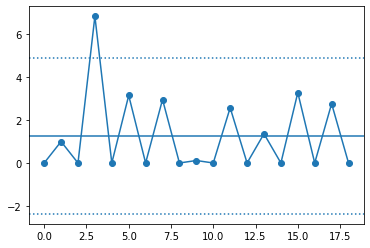

In [91]:
points = closest_isodistance_points(ratemaps[2])
test = points > np.median(points) + 2*mad(points)
#points = scipy.ndimage.gaussian_filter(points, sigma=0)
print(points)
plt.plot(np.arange(len(points)),points, '-o')
plt.axhline(np.mean(points))
plt.axhline(np.mean(points)+2*np.std(points),ls=':')
plt.axhline(np.mean(points)-2*np.std(points),ls=':')

In [12]:
np.median(points), mad(points)

(0.5433788847157537, 0.5652013167297767)

In [ ]:
np.median(points), np.mad(points)

In [ ]:
scipy.ndimage.maximum_position(points)

In [ ]:
plt.imshow(img)

In [ ]:
with open(paths['grid_scores'] / '00999_env_0.pkl', 'rb') as f:
    grid_scores = pickle.load(f)

In [ ]:
plt.hist(grid_scores)

In [ ]:
spacings = []
mad_cells = 0
for ratemap in ratemaps[grid_scores > 0.9] :
    dist, mad = grid_spacing(ratemap)
    if mad > 0.1:
        mad_cells += 1
        if mad_cells < 5:
            plt.imshow(ratemap, cmap = "inferno")
            plt.show()
        continue
    spacings.append(grid_spacing(ratemap)[0])

In [ ]:
plt.hist(spacings,bins=25)